In [46]:
pip install geopandas

#GIS BOUNDARIES FRENCH DEPARTments
#issu d'open streetmap 
vérifier à 50m
https://www.data.gouv.fr/fr/datasets/r/6e53bca5-1153-49d4-bff5-dd69f39369b5
ça donne un zip dans un dossier avec dans le dossier jupither note book ensemble


In [18]:
import geopandas as gpd

In [26]:
map_df = gpd.read_file("departements-20140306-50m-shp/departements-20140306-50m.shp")
map_df.head()

,code_insee,nom,nuts3,wikipedia,geometry
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.23987 45.77758, ..."
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48647 48.85768, ..."
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38407 46.33112, ..."
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.67673 43.83178, ..."
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24411 44.44693, ..."


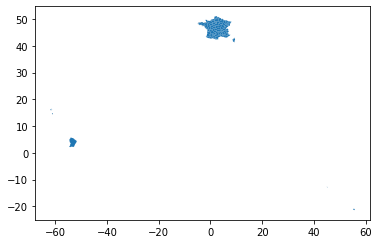

In [ ]:
import matplotlib as plt
%matplotlib inline
map_df.plot()

In [27]:
pip install descartes

In [28]:
map_df.head()
#pour retirer les dom tom -> on voit qu'ils possède 3 chiffres sur le code INSEE
#on utilise les expressions regulieres ->regex -> reperer des parterns dans du texte

,code_insee,nom,nuts3,wikipedia,geometry
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.23987 45.77758, ..."
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48647 48.85768, ..."
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38407 46.33112, ..."
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.67673 43.83178, ..."
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24411 44.44693, ..."


In [29]:
#un \d est un digit -> un chiffre en 0 et 9

map_df[map_df.code_insee.str.contains("\d\d\d")]

,code_insee,nom,nuts3,wikipedia,geometry
96,971,Guadeloupe,FR910,fr:Guadeloupe,"MULTIPOLYGON (((-61.61403 15.83955, -61.61399 ..."
97,972,Martinique,FR920,fr:Martinique,"MULTIPOLYGON (((-60.86880 14.39091, -60.86747 ..."
98,973,Guyane,FR930,fr:Guyane,"MULTIPOLYGON (((-52.58463 5.28309, -52.58316 5..."
99,974,b'La R\xe9union',FR940,b'fr:La R\xe9union',"MULTIPOLYGON (((55.77886 -21.36291, 55.77889 -..."
100,976,Mayotte,None,fr:Mayotte,"MULTIPOLYGON (((45.13667 -13.00398, 45.13859 -..."


In [31]:
map_df = map_df[map
_df.code_insee.str.contains("\d\d\d")==False]

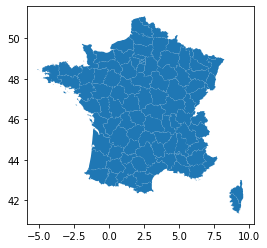

In [32]:
map_df.plot()

In [33]:
## YOU MUST KNOW REGEXPS
# REGEXP SYNTAX https://www.w3schools.com/python/python_regex.asp
# Pandas contains :

#Commentaire de Simon
#map_df[~map_df.code_insee.str.contains("\d\d\d")]
#mettre un ~marche aussi -> ça fait l'inverse -> 

#prendre le fichier par département de naissance
#https://www.insee.fr/fr/statistiques/fichier/2540004/dpt2019_csv.zip


import pandas as pd


In [34]:
prenoms = pd.read_csv("dataset/dpt2019.csv",sep = ";")

In [35]:
prenoms

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3676677,2,ZYA,2018,59,3
3676678,2,ZYA,XXXX,XX,252
3676679,2,ZYNA,2013,93,3
3676680,2,ZYNA,XXXX,XX,54


In [36]:
dpt_sum = prenoms.groupby("dpt").nombre.sum()
dpt_sum
#series 2D en texte -> pandas -> groupby -> series -> pour dataframes
#dataframes ->3D de pandas

dpt
01      440132
02      845825
03      500158
04      106020
05      126691
        ...   
971     643111
972     639827
973     174634
974    1201566
XX     8465506
Name: nombre, Length: 100, dtype: int64

In [37]:
type(dpt_sum)

pandas.core.series.Series

In [38]:
dpt_sum=dpt_sum.reset_index()

In [39]:
dpt_sum

,dpt,nombre
0,01,440132
1,02,845825
2,03,500158
3,04,106020
4,05,126691
...,...,...
95,971,643111
96,972,639827
97,973,174634
98,974,1201566


In [40]:
type(dpt_sum)

pandas.core.frame.DataFrame

In [41]:
#renommer la colonne avant le merge

In [42]:
dpt_sum["code_insee"]=dpt_sum.dpt

In [43]:
dpt_sum

,dpt,nombre,code_insee
0,01,440132,01
1,02,845825,02
2,03,500158,03
3,04,106020,04
4,05,126691,05
...,...,...,...
95,971,643111,971
96,972,639827,972
97,973,174634,973
98,974,1201566,974


In [44]:
#check si on peut merge avec 2 différents
#on pouvait renommer également la colonne

In [145]:
merged = map_df.merge(dpt_sum,on='code_insee')

In [ ]:
merged.head()

,code_insee,nom,nuts3,wikipedia,geometry,dpt,nombre
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.23987 45.77758, ...",01,383730.0
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48647 48.85768, ...",02,724248.0
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38407 46.33112, ...",03,434771.0
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.67673 43.83178, ...",04,91797.0
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24411 44.44693, ...",05,110844.0


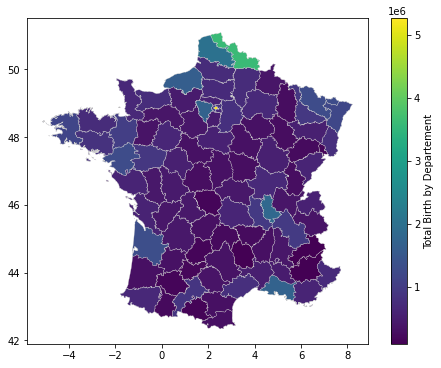

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(8, 6))

merged.plot(column="nombre",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Total Birth by Departement"})


In [ ]:
#il y a des coordonnées sur la map -> paris entre 2 et 4  et 49

In [ ]:
#ou trier (subset) des sous ensemble qui ont que les dpt d'ile de france

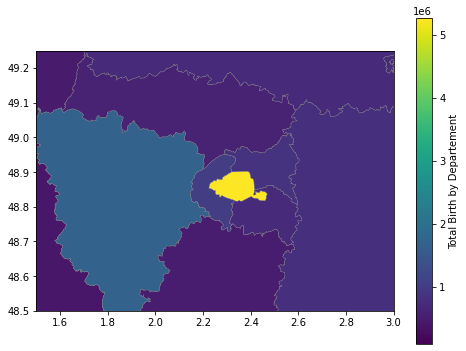

In [ ]:

fig, ax = plt.subplots(1, figsize=(8, 6))
plt.axis([1.5,3,48.5,49.25])

merged.plot(column="nombre", ax=ax , linewidth=0.3, edgecolor="0.5", legend=True, legend_kwds
            ={"label": "Total Birth by Departement"})


In [ ]:
#DOC DE GEOPANDAS
# POUR ALLER PLUS LOIN : https://geopandas.org/mapping.html


### 3. EXERCICES :
Display a choropleth map with Boys/girls total births disparity

* The same but weighted by total dpt population


* Display a choropleth map with number of girls named Emma born in 2018

* The same but weighted by total dpt population ( for instance nb of Emma births per thousand of population in the dpt )

to do this you must find a file with 2018 population for every dpt. the file must contain a department column with the same data as the prenoms dpt column...

SUPERBONUS

* choropleth map for the most innovant departements , population weighted what is innovation ?

* choropleth map for the most trendsetting departements , population weighted what is trendsetting ? we could detect firstname that appear (or come again..) in one or a few departments only, and then grows in other departments

SUPERBONUS

* choropleth map for the most innovant departements , population weighted what is innovation ?
 
* choropleth map for the most trendsetting departements , population weighted what is trendsetting ? we could detect firstname that appear (or come again..) in one or a few departments only, and then grows in other departments.


In [129]:
ratio = prenoms.groupby(["dpt","sexe"]).nombre.sum()
ratio

dpt  sexe
01   1        223592
     2        216540
02   1        430054
     2        415771
03   1        254648
              ...   
973  2         79971
974  1        617721
     2        583845
XX   1       3779609
     2       4685897
Name: nombre, Length: 200, dtype: int64

In [130]:
ratio = ratio.unstack()
ratio

sexe,1,2
dpt,,
01,223592,216540
02,430054,415771
03,254648,245510
04,55387,50633
05,65511,61180
...,...,...
971,339474,303637
972,334396,305431
973,94663,79971


In [131]:
ratio["disparity"] = ratio[1]/ratio[2]
#Ratio garcon / fille
ratio

sexe,1,2,disparity
dpt,,,
01,223592,216540,1.032567
02,430054,415771,1.034353
03,254648,245510,1.037220
04,55387,50633,1.093891
05,65511,61180,1.070791
...,...,...,...
971,339474,303637,1.118026
972,334396,305431,1.094833
973,94663,79971,1.183717


In [132]:
ratio["code_insee"]=ratio.index
ratio


sexe,1,2,disparity,code_insee
dpt,,,,
01,223592,216540,1.032567,01
02,430054,415771,1.034353,02
03,254648,245510,1.037220,03
04,55387,50633,1.093891,04
05,65511,61180,1.070791,05
...,...,...,...,...
971,339474,303637,1.118026,971
972,334396,305431,1.094833,972
973,94663,79971,1.183717,973


In [173]:
ratio.columns
merged = map_df.merge(ratio,on='code_insee')
merged


,code_insee,nom,nuts3,wikipedia,geometry,1,2,disparity
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.23987 45.77758, ...",223592,216540,1.032567
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48647 48.85768, ...",430054,415771,1.034353
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38407 46.33112, ...",254648,245510,1.037220
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.67673 43.83178, ...",55387,50633,1.093891
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24411 44.44693, ...",65511,61180,1.070791
...,...,...,...,...,...,...,...,...
89,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39427 48.33263, ...",303485,279422,1.086117
90,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31588 48.76670, ...",607741,566360,1.073065
91,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",515173,478774,1.076025
92,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",425272,395986,1.073957


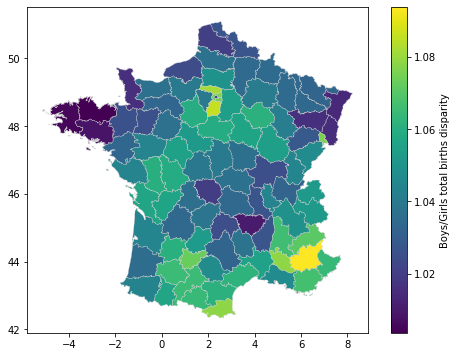

In [169]:

fig, ax = plt.subplots(1, figsize=(8, 6))

merged.plot(column="disparity",ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds={"label": "Boys/Girls total births disparity"})


In [149]:
#https://www.insee.fr/fr/statistiques/4265429?sommaire=4265511#documentation
#Population 2017 par INSEE par de population pour 2019
pop_dpt = pd.read_csv("Departements.csv",sep=";")
pop_dpt

,CODDEP,DEP,NBARR,NBCAN,NBCOM,PMUN,PTOT,Unnamed: 7
0,01,Ain,4,23.0,393,643350,659180,NaN
1,02,Aisne,5,21.0,800,534490,546527,NaN
2,03,Allier,3,19.0,317,337988,347035,NaN
3,04,Alpes-de-Haute-Provence,4,15.0,198,163915,168381,NaN
4,05,Hautes-Alpes,2,15.0,162,141284,145883,NaN
...,...,...,...,...,...,...,...,...
95,95,Val-d'Oise,3,21.0,184,1228618,1239262,NaN
96,971,Guadeloupe,2,21.0,32,390253,396153,NaN
97,972,Martinique,4,NaN,34,372594,377711,NaN
98,973,Guyane,2,NaN,22,268700,271124,NaN


https://www.insee.fr/fr/statistiques/fichier/4265429/ensemble.zip
De Benjamin BEJNBAUM à tout le monde:  05:48 PM
https://www.insee.fr/fr/statistiques/4265429?sommaire=4265511


In [174]:
col = ['CODDEP','PMUN']
pop_dpt= pop_dpt[col]
pop_dpt
pop_dpt["pop_total"] = pop_dpt.PMUN
#population municipale, on compte pas les résidances secondaires
pop_dpt["code_insee"] = pop_dpt.CODDEP
pop_dpt




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,CODDEP,PMUN,pop_total,code_insee
0,01,643350,643350,01
1,02,534490,534490,02
2,03,337988,337988,03
3,04,163915,163915,04
4,05,141284,141284,05
...,...,...,...,...
95,95,1228618,1228618,95
96,971,390253,390253,971
97,972,372594,372594,972
98,973,268700,268700,973


In [175]:
merged = map_df.merge(pop_dpt,on='code_insee')
merged


,code_insee,nom,nuts3,wikipedia,geometry,CODDEP,PMUN,pop_total
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.23987 45.77758, ...",01,643350,643350
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48647 48.85768, ...",02,534490,534490
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38407 46.33112, ...",03,337988,337988
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.67673 43.83178, ...",04,163915,163915
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24411 44.44693, ...",05,141284,141284
...,...,...,...,...,...,...,...,...
91,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39427 48.33263, ...",91,1296130,1296130
92,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31588 48.76670, ...",92,1609306,1609306
93,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",93,1623111,1623111
94,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",94,1387926,1387926


01   NaN
02   NaN
03   NaN
04   NaN
05   NaN
      ..
95   NaN
96   NaN
97   NaN
98   NaN
99   NaN
Length: 200, dtype: float64

In [185]:
ratio.columns

Index([1, 2, 'disparity', 'code_insee'], dtype='object', name='sexe')

In [186]:
pop_dpt.columns

Index(['CODDEP', 'PMUN', 'pop_total', 'code_insee'], dtype='object')